In [1]:
# Average Weighted Values Recommendation system

In [3]:
import pandas as pd
import numpy as np 


In [4]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies_df = pd.read_csv('tmdb_5000_movies.csv')

In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
# we are gonna use vote_average and vote_count to compute average weighted recommender system

In [8]:
print(credits.shape)
print(movies_df.shape)

(4803, 4)
(4803, 20)


In [9]:
# Combine the two datasets considering the column id

In [10]:
credits_renamed = credits.rename(index=str,columns={'movie_id':'id'})
movies_df_merged = movies_df.merge(credits_renamed,on='id')
movies_df_merged.shape
# print(mob)


(4803, 23)

In [11]:
# The datasets have been merged.

In [12]:
movies_df_cleaned = movies_df_merged.drop(columns=['homepage','title_x','title_y','status','production_countries']) 
# Dropped unnecessary columns
movies_df_cleaned.shape

(4803, 18)

In [13]:
movies_df_cleaned.info()
# Check for NaN values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

In [14]:
# Weigted Average for each movie

# Weigted Rating = Average Movie Rating (0-10)*v + mean vote across the whole report * m  / v(Number of ratings for that movie + m (Minimum number of ratings to be listed in top 250)) 




In [15]:
v = movies_df_cleaned['vote_count']
R = movies_df_cleaned['vote_average']
C = movies_df_cleaned['vote_average'].mean()
m = movies_df_cleaned['vote_count'].quantile(0.70)

# Only those movies who have atleast 70% of the total votes we select only those movies

In [16]:
movies_df_cleaned['weighted_average'] = ((R*v + C*m)/(v + m))

In [17]:
movies_df_cleaned['weighted_average'].head()

0    7.148013
1    6.807627
2    6.276075
3    7.509565
4    6.098319
Name: weighted_average, dtype: float64

In [18]:
movies_sorted = movies_df_cleaned.sort_values('weighted_average',ascending=False)
movies_sorted[['original_title','vote_count','vote_average','weighted_average','popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

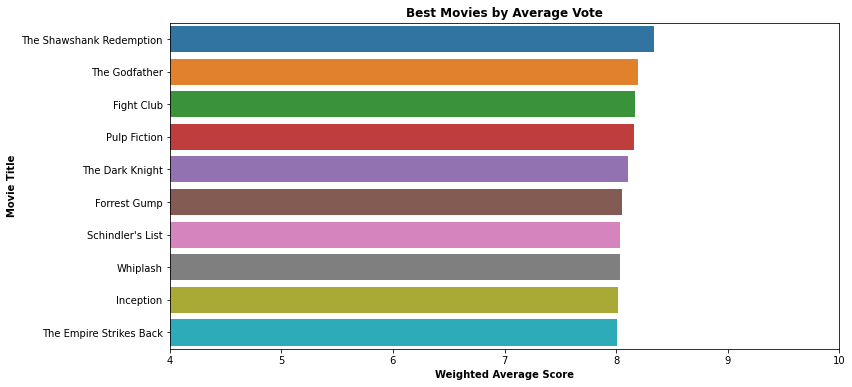

In [21]:
weighted_average = movies_sorted.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1 = sns.barplot(x=weighted_average['weighted_average'].head(10),y=weighted_average['original_title'].head(10))
plt.xlim(4,10)
plt.title('Best Movies by Average Vote',weight='bold')
plt.xlabel('Weighted Average Score',weight='bold')
plt.ylabel('Movie Title',weight='bold')
plt.savefig('movies.png')

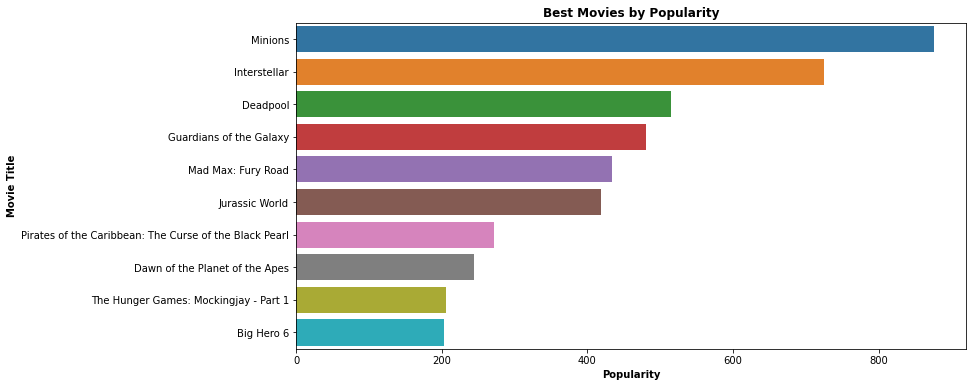

In [26]:
popularity_df = movies_sorted.sort_values('popularity',ascending=False)
# print(popularity_df.head())
plt.figure(figsize=(12,6))
axis1 = sns.barplot(x=popularity_df['popularity'].head(10),y=popularity_df['original_title'].head(10))
# plt.xlim(4,10)
plt.title('Best Movies by Popularity',weight='bold')
plt.xlabel('Popularity',weight='bold')
plt.ylabel('Movie Title',weight='bold')
plt.savefig('movies_by_popularity.png')

In [ ]:
# Popularity can also be an important metric we give 50% to popularity and 50% to weighted average

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
movie_scaled_df = scaler.fit_transform(movies_df_cleaned[['weighted_average','popularity']])

movie_normalised = pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalised.head()

,weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [29]:
movies_df_cleaned[['normalized_weight','normalized_popularity']] = movie_normalised

In [31]:
# movies_df_cleaned.head()

In [34]:
movies_df_cleaned['score'] = movies_df_cleaned['normalized_weight']*0.5 + movies_df_cleaned['normalized_popularity']*0.5
movies_score_sorted = movies_df_cleaned.sort_values(['score'],ascending=False)

In [35]:
movies_score_sorted[['original_title','normalized_weight','normalized_popularity','score']].head(20)

,original_title,normalized_weight,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


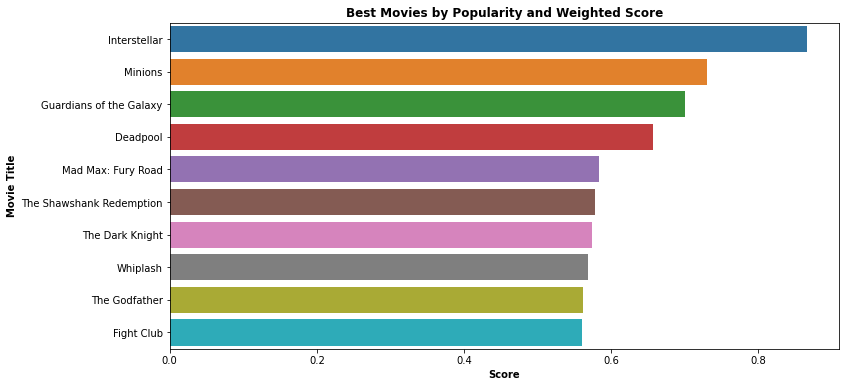

In [36]:
# popularity_df = movies_sorted.sort_values('popularity',ascending=False)
# print(popularity_df.head())
plt.figure(figsize=(12,6))
axis1 = sns.barplot(x=movies_score_sorted['score'].head(10),y=movies_score_sorted['original_title'].head(10))
# plt.xlim(4,10)
plt.title('Best Movies by Popularity and Weighted Score',weight='bold')
plt.xlabel('Score',weight='bold')
plt.ylabel('Movie Title',weight='bold')
plt.savefig('movies_by_score.png')